### Question 1: Compare Linear regression, Polynomial regression and local regression (40)

The AirQualityUCI data set contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Replace 'your_file.csv' with the actual path to your dataset file.
AirQualityUCI = pd.read_csv('AirQualityUCI.csv')

1. Remove all the missing values and the first two columns from the data. How many rows and columns we have in the end? Split the data into training(80%) and testing(20%) data.

In [2]:
df_aq = AirQualityUCI
df_aq = df_aq.drop(['Unnamed: 0', 'Date', 'Time', 'X', 'X.1'], axis=1)
df_aq_cleaned = df_aq.dropna(axis=0,how='any')

# Define the target variable
target = df_aq_cleaned['HourlyCO']
df_dropped = df_aq_cleaned.drop('HourlyCO', axis=1)  # Drop 'target' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_dropped, target, test_size=0.2, random_state=4400)

print(f'rows: {df_aq_cleaned.shape[0]}, columns {df_aq_cleaned.shape[1]}')

rows: 827, columns 13


2. Suppose we are interested in predicting the HourlyCO in the data, using all the other variables. Fit a linear regression model and report the MSE. 

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


# Calculate the mse and print
MSE = mean_squared_error(y_test, y_pred)
print(f'The MSE of this linear regression model is: {MSE}')

The MSE of this linear regression model is: 0.05362946908796483


3. Now let's fit a another model, still use all variables but fit a polynomial regression model with degree 2. Report the MSE.  

In [4]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Calculate the estimated values for each observation
y_poly_fit = poly_model.predict(X_poly_test)

MSE = mean_squared_error(y_test, y_poly_fit)
print(f'The MSE of this polynomial regression model with degree 2 is: {MSE}')

The MSE of this polynomial regression model with degree 2 is: 0.04774031290312567


4. Keep increasing the degree to 3. How does the MSE change and can you explain why?

In [5]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly_features = PolynomialFeatures(degree=degree)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Calculate the estimated values for each observation
y_poly_fit = poly_model.predict(X_poly_test)

MSE = mean_squared_error(y_test, y_poly_fit)
print(f'The MSE of this polynomial regression model with degree 3 is: {MSE}')

The MSE of this polynomial regression model with degree 3 is: 5.335598447773761


### Why does the MSE change?

The MSE increases when I change the degree from 2 to 3. It increased the MSE because it might be overfitting. As the degree of the polynomial increases, the model becomes more flexible and can fit the training data points with high precision. It may capture even the noise in the training data, resulting in a lower training error (MSE). However, this fine-grained fitting of training data may not generalize well to unseen data. When you increase the degree of a polynomial regression model, you are allowing the model to capture more complex relationships between the independent variables (features) and the dependent variable (target). In some cases, the relationship between the features and the target variable may be inherently complex, and a higher-degree polynomial can better capture these patterns. A higher-degree polynomial model can become overly complex and fit noise in the data rather than the underlying true relationship. 

### Question 2: Compare Regularization methods (45)

1. We notice that we may not want to use all the features in the dataset and it seems that some features are not independent with each other. Therefore, we want to apply the regularization methods. What are the three regularization methods we have discussed in the lecture and briefly state their differences. (5)

The three regularization methods are Lasso, Ridge, and Elastic Net Regression.

Ridge Regression 
- estimates regression coefficients with a restriction on the sum of the squared coefficients
- has multicollinearity among the features 
- works best in situations where the least squares estimates have high variance
- computational advantage over variable selection algorithims
- ridge does not perform feature selection, as it only shrinks the coefficients towards zero without eliminating any features.
- ridge reduces the coefficients' magnitude, but they are unlikely to become exactly zero. 

Lasso Regression
- estimates regression coefficients with a restricition on the sum of the absolute value of the coefficients
- unlike ridge regression, βLj can be zero
- lasso produces sparse models, which are models that contain only a subset of the possible variables

Elastic Net Regression
- combine the advantages of Lasso and Ridge regularization
- can handle situations where lasso might select only one feature from a group of highly correlated features, as it introduces the Ridge penaly to help keep related features together

2. What is the pre-processing steps that required to perform regularization and why? Perform this pre-processing steps. (5)

Since regularization methods can be very sensitive to the scale of the data. The magnitude of the estimated coefficients depends on the different units of the input variable. So, we must pre-process all of the data by transforming the input variables to be on the same scale.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the target variable
target = df_aq_cleaned['HourlyCO']
df_dropped = df_aq_cleaned.drop('HourlyCO', axis=1)  # Drop 'target' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_dropped, target, test_size=0.2, random_state=4400)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Fit Lasso model with the best tuning parameter. Report MSE. Print the table for the coefficients. Hint, you can use the list of alpha we show in the lecture, if your best alpha is at the boundary, it is OK, no need to keep increaing the range. (10)

In [7]:
# Fit a Lasso regression model
alpha = 0.1  # L1 regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, y_pred)
# Print the results
print("Mean Squared Error (MSE):", lasso_mse)

Mean Squared Error (MSE): 0.07744396486954332


        Feature  Coefficient Estimate
0       PT08_S1              0.135334
1          NMHC              0.122223
2       Benzene              0.665002
3       PT08_S2              0.000000
4           NOx              0.386097
5       PT08_S3             -0.000000
6           NO2              0.009723
7       PT08_S4              0.000000
8       PT08_S5              0.000000
9          Temp             -0.000000
10  RelHumidity              0.000000
11  AbsHumidity              0.000000


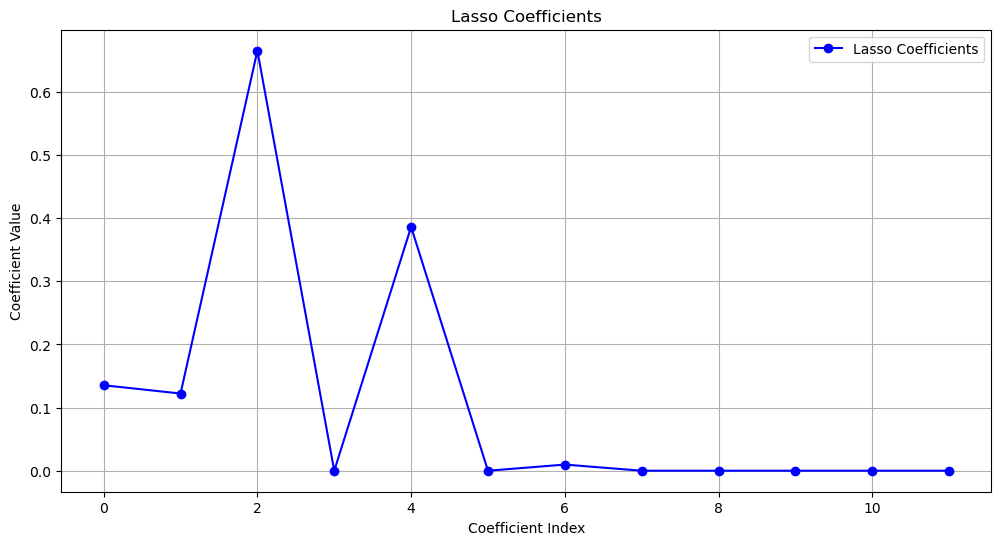

In [8]:
coeff_df = pd.DataFrame(df_dropped.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(lasso_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(lasso_model.coef_, marker='o', linestyle='-', color='b', label='Lasso Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.legend()
plt.grid(True)
plt.show()

4. Fit Ridge model with the best tuning parameter. Report MSE. Print the table for the coefficients. (10)

In [9]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
ridge_mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", ridge_mse)

Mean Squared Error (MSE): 0.05341490038927197


        Feature  Coefficient Estimate
0       PT08_S1              0.324332
1          NMHC              0.157990
2       Benzene              1.142321
3       PT08_S2             -0.402849
4           NOx              0.354878
5       PT08_S3             -0.050177
6           NO2              0.168560
7       PT08_S4             -0.120850
8       PT08_S5             -0.219512
9          Temp             -0.197877
10  RelHumidity             -0.134074
11  AbsHumidity              0.106506


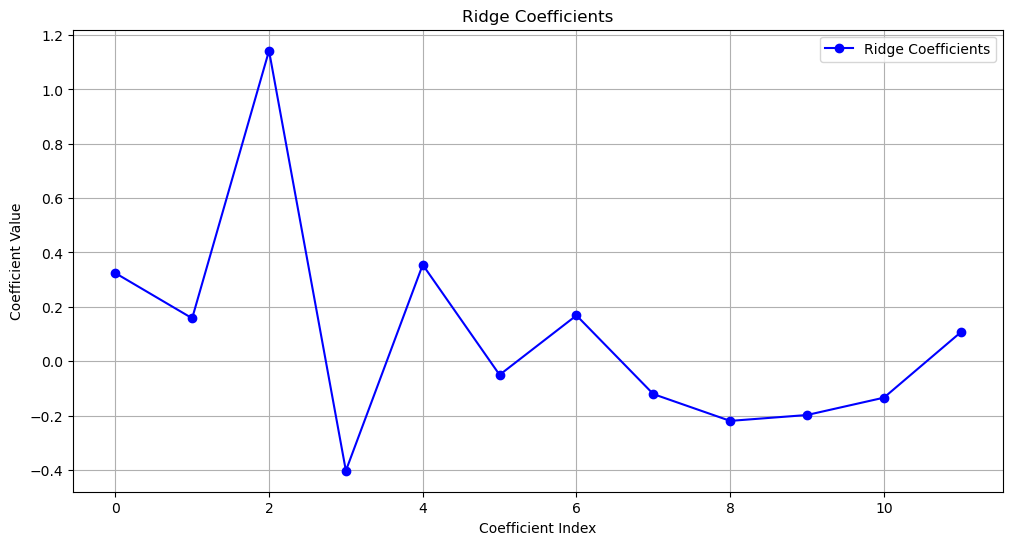

In [10]:
coeff_df = pd.DataFrame(df_dropped.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(ridge_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(ridge_model.coef_, marker='o', linestyle='-', color='b', label='Ridge Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficients")
plt.legend()
plt.grid(True)
plt.show()

5. Fit Elastic net model with the best tuning parameter. Report MSE. Print the table for the coefficients. 

Hint: even though we did not include this in the lecture, you can image it is pretty similar to the Lasso and ridge. The function is called ElasticNet and notice that there are two parameters to tune: 'alpha' and 'l1_ratio'. You can use grid_search.best_params_['alpha'] to extract the best parameter for alpha. (15)

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

alpha = 0.1  # L1 regularization strength (adjust as needed)
l1_ratio = 0.5
elasticnet_model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
elasticnet_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elasticnet_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
elastic_mse = mean_squared_error(y_test, y_pred)
# Print the results
print("Mean Squared Error (MSE) before adjusting alpha and l1:", elastic_mse)

Mean Squared Error (MSE) before adjusting alpha and l1: 0.0726509692814735


In [12]:
# Define a range of alpha values and l1 ratio to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratio = [0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9]

# Create a parameter grid for GridSearchCV as a dictionary
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratio}
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha and L1 ratio values from the tuning
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Create the final Elastic Net model with the best hyperparameters
elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elasticnet_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elasticnet_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
elastic_mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", elastic_mse)

Mean Squared Error (MSE): 0.052909393270906775


        Feature  Coefficient Estimate
0       PT08_S1              0.306644
1          NMHC              0.173354
2       Benzene              0.982057
3       PT08_S2             -0.243876
4           NOx              0.353443
5       PT08_S3             -0.002638
6           NO2              0.160057
7       PT08_S4             -0.075675
8       PT08_S5             -0.206558
9          Temp             -0.192996
10  RelHumidity             -0.130143
11  AbsHumidity              0.100686


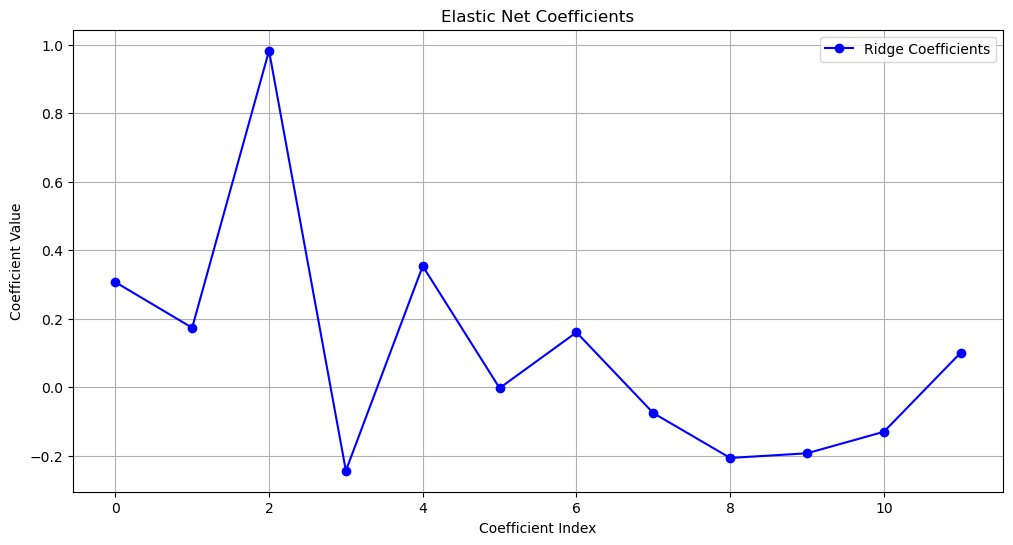

In [13]:
coeff_df = pd.DataFrame(df_dropped.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(elasticnet_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(elasticnet_model.coef_, marker='o', linestyle='-', color='b', label='Ridge Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients")
plt.legend()
plt.grid(True)
plt.show()

### Question 3: Implement Gradient Descent for Ridge (15)

Try to modify your earlier implementation for the linear regression gradient descent, so that now it is the gradient descent for ridge. Apply the Air quality data to make sure it works. 

Hint: The only thing you want to change is the gradient and cost function, which will now have an extra term. You can set the tuning parameter alpha as 0.01. 

In [14]:
# Implement the gradient descent functions. Import any module if you need.
def compute_cost(prediction, y, alpha, theta):
    m = len(y)
    cost = 1/(2*m) * np.sum((prediction - y) ** 2) + (alpha/(2*m)) * np.sum(theta**2)
            
    return cost

def ridge_gradient_descent(X_b, y, theta, alpha, learning_rate = 0.01, num_iterations = 100):
    '''
    The function takes in values for X_bm, y, theta, learning rate, and num_iterations defined
    by the user. The function calculates the gradient descent and returns
    the theta and cost history.
    '''
    cost_history = []
    m = len(y)
    
    for i in range(num_iterations):
        prediction = np.dot(X_b, theta)
        error = prediction - y
        gradient = ((2/m)* (error.T.dot(X_b))+ np.sum(2* (alpha/m) * theta))
        theta = theta - learning_rate * gradient.T
        cost = compute_cost(prediction, y, theta, alpha)
        cost_history.append(cost)
        

    return theta, cost_history

X_train_r = np.column_stack((np.ones(len(X_train_scaled)), X_train_scaled))
theta = np.zeros(X_train_r.shape[1])  # Assuming two parameters (intercept and coefficient)
learning_rate = 0.01
num_iterations = 1200
alpha = 0.01

final_theta, cost_history = ridge_gradient_descent(X_train_r, y_train, theta, alpha, learning_rate, num_iterations)

print("Final theta:", final_theta)
print("Final cost:", cost_history[-1])


Final theta: [ 2.35031861  0.25508763  0.25003898  0.39819052  0.17130393  0.33022527
  0.13486397  0.13660056  0.19302532 -0.13850364 -0.09730493 -0.04028529
 -0.00566161]
Final cost: [0.02720648 0.02720632 0.02720632 0.02720633 0.02720631 0.02720633
 0.02720631 0.02720631 0.02720632 0.02720629 0.02720629 0.0272063
 0.0272063 ]


In [15]:
# Calculate predictions using the final theta values
predictions = np.dot(X_train_r, final_theta)

# Calculate the squared differences between predictions and actual values
squared_errors = (predictions - y_train) ** 2

# Calculate the MSE (mean of squared errors)
mse = np.mean(squared_errors)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05441067026802387
